<a href="https://colab.research.google.com/github/SrijaaimeenakshiM/ml-classification-hub/blob/main/multiclass_classification/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Working with a larger example(multiclass classification)


when you have more than two classes as an option ,it is known as multiclass classification.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#here the data is already splitted into training and test set

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#this are set of clothes and wearing accessories when we are printing it will be displayed as array of numbers

#Yep!! lets try

In [ ]:
print(f"X_train:{X_train[0]}")
print(f"y_train:{y_train[0]}")

X_train:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 20

In [ ]:
#check the shape of a single example
print(X_train[0].shape),print(y_train[0].shape)

(28, 28)
()


(None, None)

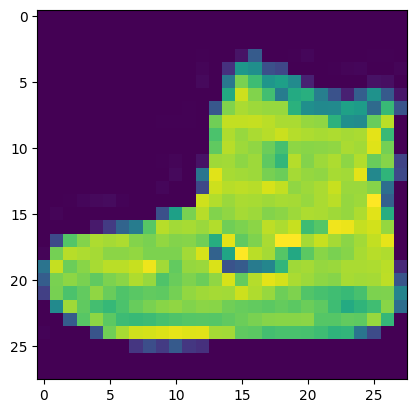

In [ ]:
#when u plot this u will get the exact materials
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

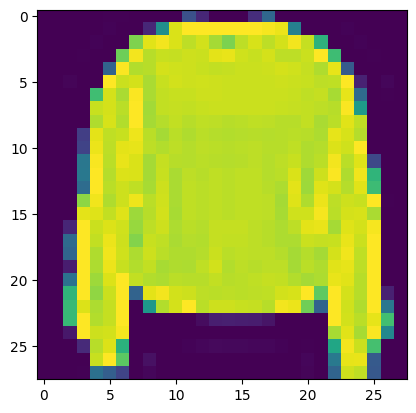

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

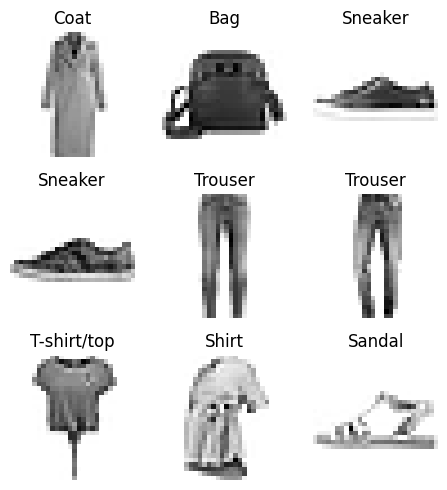

In [ ]:
classes=["T-shirt/top",
	"Trouser",
"Pullover",
	"Dress",
	"Coat",
  "Sandal",
	"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]
import random
plt.figure(figsize=(5,5))
for i in range(9):
  random_index=random.choice(range(len(X_train)))
  ax= plt.subplot(3,3,i+1)
  plt.imshow(X_train[random_index],cmap=plt.cm.binary)
  plt.title(classes[y_train[random_index]])
  plt.axis(False)
  plt.tight_layout()

#Building a multiclass classification model
for categorical cross entropy the labels must be one hot encodded,so we can use SparseCategoricalCrossentropy() if your label is onehot encodded use CategoricalCrossentropy()

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")])#here the output layer must be te number of classes

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0986 - loss: 2.5781 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0987 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3026 - val_accuracy: 0.1002 - val_loss: 2.3021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0992 - loss: 2.3025 - val_accuracy: 0.1002 - val_loss: 2.3022
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0997 - loss: 2.3010 - val_accuracy: 0.1045 - val_loss: 2.2922
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.1056 - loss: 2.2882 - val_accuracy: 0.1058 - val_loss: 2.2895
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1158 - loss: 2.2669 - val_accuracy: 0.1638 - val_loss: 2.0902
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1768 - loss: 2.032

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2659 - loss: 1.6857


[1.6818952560424805, 0.27129998803138733]

<Axes: >

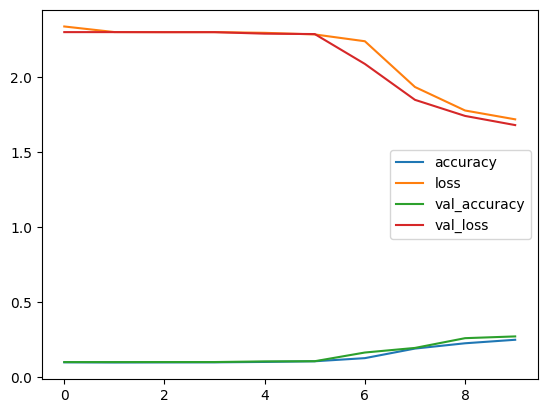

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [ ]:
#we can scale the features to get beter results
X_train.max(),X_test.max()

(255, 255)

In [ ]:
# we are going to do normalization
X_train=X_train/255
X_test=X_test/255

In [ ]:
#let's check the max and min value
X_train.min(),X_train.max()

(0.0, 1.0)

In [ ]:

tf.random.set_seed(42)

model_1=tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")])#here the output layer must be te number of classes

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1=model_1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4107 - loss: 1.6229 - val_accuracy: 0.7455 - val_loss: 0.6724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7558 - loss: 0.6524 - val_accuracy: 0.7651 - val_loss: 0.6240
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7725 - loss: 0.6107 - val_accuracy: 0.7730 - val_loss: 0.6068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7802 - loss: 0.5919 - val_accuracy: 0.7774 - val_loss: 0.5975
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7857 - loss: 0.5806 - val_accuracy: 0.7811 - val_loss: 0.5916
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7890 - loss: 0.5726 - val_accuracy: 0.7826 - val_loss: 0.5877
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7919 - loss: 0.5663 - val_accuracy: 0.7849 - val_loss: 0.5842
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7939 - loss: 0.5610 -

<Axes: title={'center': 'normalized data'}>

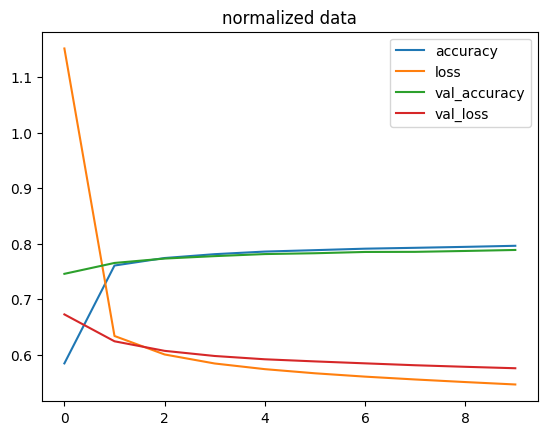

In [ ]:
pd.DataFrame(history_1.history).plot(title="normalized data")

#Finding the learning rate

In [ ]:
#Finding the learning rate
tf.random.set_seed(42)


model_2=tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")])#here the output layer must be te number of classes

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history_2=model_2.fit(X_train,
                      y_train,
                      epochs=40,
                      validation_data=(X_test,y_test),
                      callbacks=[lr])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1951 - loss: 2.1457 - val_accuracy: 0.4020 - val_loss: 1.6388 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4637 - loss: 1.4740 - val_accuracy: 0.5727 - val_loss: 1.1468 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5901 - loss: 1.0856 - val_accuracy: 0.6391 - val_loss: 1.0011 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6533 - loss: 0.9645 - val_accuracy: 0.6895 - val_loss: 0.9216 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7010 - loss: 0.8869 - val_accuracy: 0.7342 - val_loss: 0.8530 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7448 - loss: 0.8171 - val_accuracy: 0.7571 - val_loss: 0.7885 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/ste

#plotting loss and learning rate

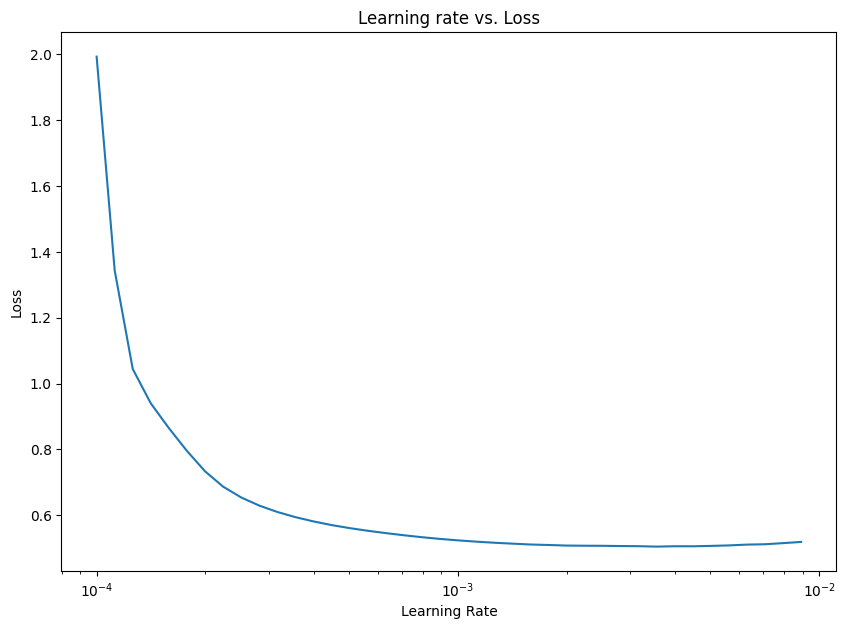

In [ ]:
import matplotlib.pyplot as plt

lrs = 1e-4 * (10**(tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
tf.random.set_seed(42)
input_layer = tf.keras.layers.Input(shape=(28, 28))
model_3=tf.keras.Sequential(
    [ input_layer,  # Use the input layer here
      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")])#here the output layer must be te number of classes

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history_3=model_3.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4305 - loss: 1.5144 - val_accuracy: 0.6546 - val_loss: 0.9124
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6875 - loss: 0.8576 - val_accuracy: 0.7132 - val_loss: 0.7775
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7416 - loss: 0.7274 - val_accuracy: 0.7468 - val_loss: 0.7148
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7637 - loss: 0.6761 - val_accuracy: 0.7586 - val_loss: 0.6922
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7727 - loss: 0.6539 - val_accuracy: 0.7642 - val_loss: 0.6795
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7783 - loss: 0.6406 - val_accuracy: 0.7708 - val_loss: 0.6681
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7824 - loss: 0.6305 - val_accuracy: 0.7731 - val_loss: 0.6611
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7854 - loss: 0.6230 -

In [ ]:
y_pred=model_3.predict(X_test)
y_pred



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.4221849e-06, 3.6595045e-06, 2.1385904e-06, ..., 1.5787472e-01,
        6.1163693e-05, 6.8269229e-01],
       [2.1497298e-04, 9.5464099e-13, 9.6109241e-01, ..., 0.0000000e+00,
        1.7135766e-03, 0.0000000e+00],
       [1.2681970e-03, 9.9866939e-01, 1.1357916e-07, ..., 9.5357215e-11,
        3.5013887e-05, 9.4428415e-25],
       ...,
       [2.9103419e-02, 6.0152248e-05, 3.9878285e-01, ..., 3.1179285e-15,
        6.1551757e-02, 3.2880900e-24],
       [5.8300514e-03, 9.6206957e-01, 6.1042090e-07, ..., 2.9197658e-12,
        3.3462726e-07, 1.2004321e-18],
       [5.9220911e-04, 1.9830413e-04, 1.7373548e-03, ..., 2.4154570e-02,
        6.3926116e-02, 2.1544305e-05]], dtype=float32)

In [ ]:
import numpy as np
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 2, 1, 5])

In [ ]:
#confusion metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_labels)
cm


array([[775,  11,  33,  91,   3,   2,  70,   0,  15,   0],
       [ 11, 918,   3,  60,   0,   0,   2,   0,   6,   0],
       [ 32,   1, 745,  18, 111,   2,  66,   0,  25,   0],
       [ 46,  30,  16, 809,  27,   5,  53,   0,  12,   2],
       [  4,   0, 202,  38, 660,   5,  69,   0,  22,   0],
       [  0,   1,   0,   1,   0, 874,   0,  63,  11,  50],
       [157,   3, 222,  80, 144,   3, 365,   0,  26,   0],
       [  0,   0,   0,   0,   0,  38,   0, 929,   1,  32],
       [  4,   2,  33,   8,  10,  23,   5,   6, 909,   0],
       [  0,   0,   1,   3,   0,  17,   0,  62,   0, 917]])

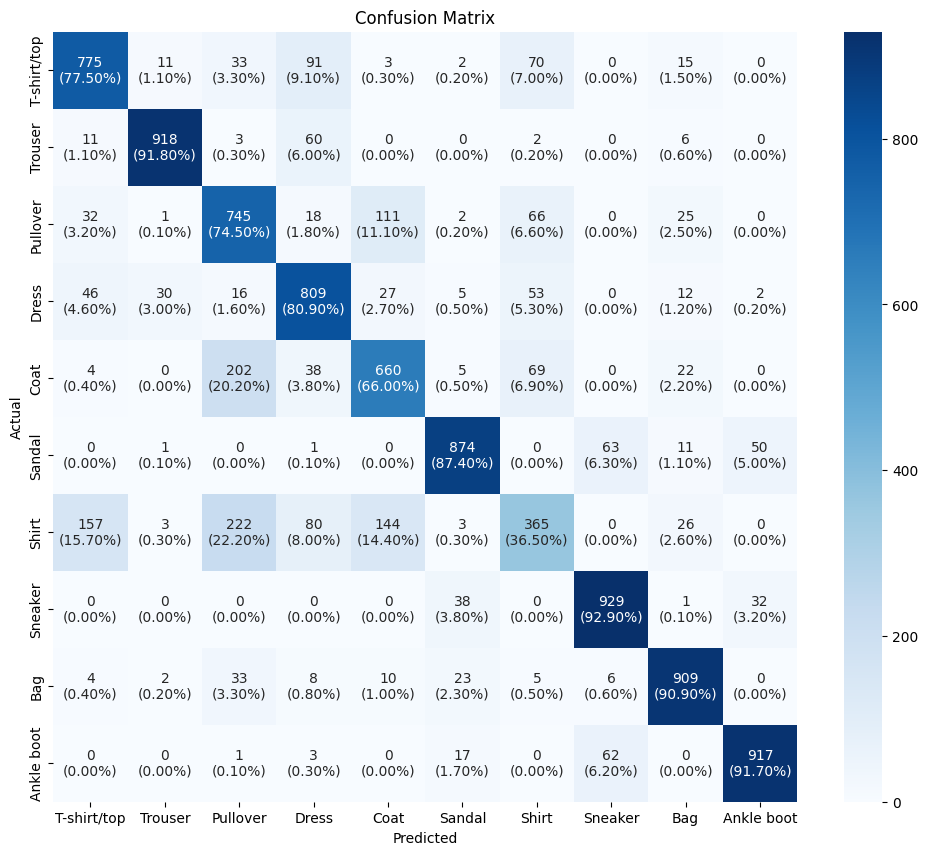

In [ ]:
plt.figure(figsize=(12,10))
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annot = np.empty_like(cm, dtype=object)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.2f}%)'

sn.heatmap(cm, annot=annot, fmt='', cmap='Blues',linewidth=0.001,linecolor="black",
            xticklabels=classes,
            yticklabels=classes)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#How about we create a fun little function for:
  * plot a random image(there are various image in the test set we can randomly pic the images and predict it)

  * you are going to predict 1 single image so u should reshape that into(1,28,28)

  * in title  label the original answer in test data and predicted data




In [ ]:
def plot_images(model,X_test,y_test,classes):
  random_index=random.choice(range(len(X_test)))
  random_image=X_test[random_index]
  y_pred=model.predict(random_image.reshape(1,28,28))
  y_pred_class=classes[y_pred.argmax()]
  y_test_class=classes[y_test[random_index]]

  plt.figure(figsize=(10,7))
  plt.imshow(random_image,cmap=plt.cm.binary)


  if y_pred_class==y_test_class:
    color="green"
  else:
    color="red"


  plt.title("Pred:{} {:2.0f}%  (True:{})".format(y_pred_class,
                                                  np.max(y_pred)*100,
                                                  y_test_class,
                                                 ),color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


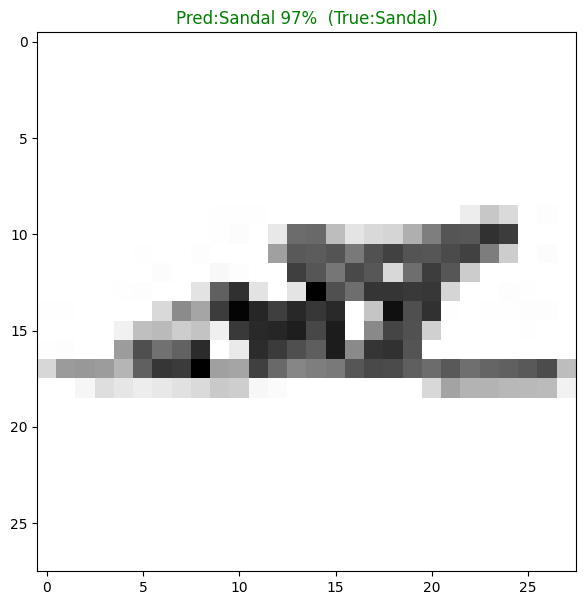

In [ ]:
plot_images(model_3,X_test,y_test,classes)